## ML Challenge WS 2022/23

#### Task:

Your Task is to train a clickbait filter to classify clickbait articles by their headline. You freely decide how to prepare the data and which ML model to use for classification.

The challenge is considered passed if your model performs better than our baseline (a simple classifier; F1 ~0.89). Report at least the F1 score of your classifier. Your model will be evaluated using a hold out dataset. Please prepare a script so your trained model can be evaluated with this dataset.

#### Dataset:

The data consists of two files, a text file with clickbait headlines and one with headlines from news sources. The hold out dataset is organized the same way.

In [ ]:
Submitted by rajan sah (tunika -1622936)

In [ ]:
#still empji remove 
#type short and fast texting so spelling mistake 
#use differnet ngram in countvectorizer 

#2.tf idf 

#drop duplicates
#gauss naives 
#reduce the feature while vectorizing to see if it improves 
#ngram in countvectorizer -if use ngram -1 , data would be too much 
#if memory error when increase range in ngram, use max_feature =5000
#try different legth of feature 
#tfidf -

###use word2vec -coding part 
#how to convert sentence into vec 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# with open('clickbait_no') as f:
#     lines = [line.rstrip() for line in f]

# lines[0:10]

# type(lines)
# #lines[0:]

list

Reading file from clickbait no

In [ ]:
#clickbait no file
f = open('clickbait_no', "r")

lines = [line.rstrip() for line in f]

text = f.readlines()
#print(lines)


In [4]:
#create df from file 
import pandas as pd

clickbaitNodf= pd.DataFrame(lines)


clickbaitNodf.columns=['content']




clickbaitNodf['label']=0


clickbaitNodf

,content,label
0,Soccer Provides Oasis in Mexican City Ravaged ...,0
1,Five police officers injured in Naples protest...,0
2,International experts probe deadly Ebola Resto...,0
3,UK elections: Gordon Brown offers resignation ...,0
4,Eric Bogosian on writing and the creative urge,0
...,...,...
14460,UK's Liverpool FC unveils plans for new stadium,0
14461,"Doughnut on display in Springfield, New Zealand",0
14462,Colombian soldiers killed by rebel group,0
14463,UEFA president Platini confirms Euro 2012 to b...,0


###### Reading file from clickbait yes

In [5]:
#clickbait yes file
f = open('clickbait_yes', "r")

lines = [line.rstrip() for line in f]

text = f.readlines()
#print(lines)


In [6]:
#create df from file 
import pandas as pd

clickbaityesdf= pd.DataFrame(lines)


clickbaityesdf.columns=['content']


clickbaityesdf['label']=1


clickbaityesdf

,content,label
0,Guys Try Tinder,1
1,Michael B. Jordan Got Laid The Fuck Out While ...,1
2,What's The Most Fucked Up Thing You've Done On...,1
3,How Far Would You Make It In The Hunger Games,1
4,If Matthew Gray Gubler's Tweets Were Motivatio...,1
...,...,...
14330,This Dad Just Shut It Down By Videobombing His...,1
14331,21 Gorgeous Drinking Accessories To Get You El...,1
14332,23 Cheap Upgrades That Will Actually Increase ...,1
14333,Indian Girls Revealed What Kind Of Porn They L...,1


merge both df 

In [8]:


#print('After merging:')
finaldfclickbait=pd.concat([clickbaitNodf, clickbaityesdf], axis=0)


finaldfclickbait

,content,label
0,Soccer Provides Oasis in Mexican City Ravaged ...,0
1,Five police officers injured in Naples protest...,0
2,International experts probe deadly Ebola Resto...,0
3,UK elections: Gordon Brown offers resignation ...,0
4,Eric Bogosian on writing and the creative urge,0
...,...,...
14330,This Dad Just Shut It Down By Videobombing His...,1
14331,21 Gorgeous Drinking Accessories To Get You El...,1
14332,23 Cheap Upgrades That Will Actually Increase ...,1
14333,Indian Girls Revealed What Kind Of Porn They L...,1


In [10]:
# #lenght of dataframe 

# print(len(finaldfclickbait))

# print(len(clickbaitNodf)+len(clickbaityesdf))

In [14]:

pos_neg_count=[clickbaityesdf['label'].count(),clickbaitNodf['label'].count()]

pos_neg_count

[14335, 14465]

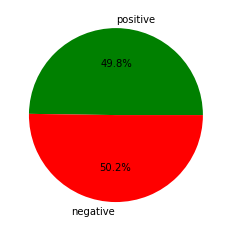

In [15]:
fig = plt.figure(figsize=(4,4))
piechart = plt.pie(pos_neg_count,labels=["positive","negative"], autopct ='%1.1f%%', colors = ['green', 'red'])

In [ ]:
preprocess data 

In [16]:


import nltk
try:
    nltk.data.find('stopwords')
except LookupError:
    nltk.download('stopwords')
    
try:
    nltk.data.find('punkt')
except LookupError:
    nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>
[nltk_data] Error loading punkt: <urlopen error [Errno 60] Operation
[nltk_data]     timed out>


In [115]:
# from nltk.corpus import stopwords

# def remove_stopwords(text):
#     output = ""
#     text = text.split(" ")
#     for word in text:
#         if word not in stopwords.words("english"):
#             output = output + " " + word
#         else:
#             output = text
#     return output

In [17]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    return ' '.join(word_tokenize(text))

In [142]:
# import re

# def remove_tags(text):
#     text = re.sub('<[^>]*>','',text)
#     #text=re.sub(r'[^\w]', '', text)
#     return text

In [438]:
# from nltk.stem.porter import PorterStemmer
# from nltk.corpus import stopwords

# def stemming(text):
#     porter = PorterStemmer()
#     stems = [porter.stem(word) for word in text.split()]
#     return " ".join(stems)

In [144]:
# def preprocessor(text):
#     text = tokenize(text)
#     #text = remove_stopwords(text)
#     text = remove_tags(text)
#     text = stemming(text)
#     return text

In [18]:
finaldfclickbait1 = finaldfclickbait.copy()

In [20]:
finaldfclickbait1

,content,label
0,Soccer Provides Oasis in Mexican City Ravaged ...,0
1,Five police officers injured in Naples protest...,0
2,International experts probe deadly Ebola Resto...,0
3,UK elections: Gordon Brown offers resignation ...,0
4,Eric Bogosian on writing and the creative urge,0
...,...,...
14330,This Dad Just Shut It Down By Videobombing His...,1
14331,21 Gorgeous Drinking Accessories To Get You El...,1
14332,23 Cheap Upgrades That Will Actually Increase ...,1
14333,Indian Girls Revealed What Kind Of Porn They L...,1


In [437]:
# #work more on preprocessing data to improve model 
# pd.options.display.max_colwidth = 2000
# finaldfclickbait1.iloc[45,:]

step 1
convert into lower case

content2 is transformed column


In [21]:

finaldfclickbait1['content2']= finaldfclickbait1['content'].apply(lambda x: x.lower())

In [22]:
finaldfclickbait1.iloc[45,:]

content     Aid to Poor Nations Rises, but Even More Is Asked
label                                                       0
content2    aid to poor nations rises, but even more is asked
Name: 45, dtype: object

In [126]:
type(finaldfclickbait1)

pandas.core.frame.DataFrame

In [ ]:
# step 2- remove tags 
# step 3 -remove prounciation
# step 4 -stopwords 
# step 4 -stemming ,



step 2 -remove tags 

In [23]:


import re

def remove_tags(text):
    text=re.sub('<[^>]*>','',text)
    text = re.sub('<[^>]*>','',text)
    #text=re.sub(r'[^\w]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub('\[.*?\]', ' ', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('“','',text)
    text = re.sub('”','',text)
    text = re.sub('’','',text)
    text = re.sub('–','',text)
    text = re.sub('‘','',text)
    return text

In [24]:
import spacy
nlp = spacy.load("en_core_web_lg")
finaldfclickbait1['content2'] = finaldfclickbait1['content2'].apply(lambda text: remove_tags(text))

In [26]:
pd.options.display.max_colwidth = 2000
finaldfclickbait1

,content,label,content2
0,Soccer Provides Oasis in Mexican City Ravaged by Drug War,0,soccer provides oasis in mexican city ravaged by drug war
1,Five police officers injured in Naples protest over new garbage tip,0,five police officers injured in naples protest over new garbage tip
2,International experts probe deadly Ebola Reston virus outbreak in Philippine pigs,0,international experts probe deadly ebola reston virus outbreak in philippine pigs
3,UK elections: Gordon Brown offers resignation to secure Labour-Liberal coalition,0,uk elections: gordon brown offers resignation to secure labour-liberal coalition
4,Eric Bogosian on writing and the creative urge,0,eric bogosian on writing and the creative urge
...,...,...,...
14330,This Dad Just Shut It Down By Videobombing His Daughters Dancing,1,this dad just shut it down by videobombing his daughters dancing
14331,21 Gorgeous Drinking Accessories To Get You Elegantly Wasted,1,21 gorgeous drinking accessories to get you elegantly wasted
14332,23 Cheap Upgrades That Will Actually Increase The Value of Your Home,1,23 cheap upgrades that will actually increase the value of your home
14333,"Indian Girls Revealed What Kind Of Porn They Like, And Their Choices May Surprise You",1,"indian girls revealed what kind of porn they like, and their choices may surprise you"


step 3: remove punctuation 

In [27]:

def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))


In [28]:
import string
finaldfclickbait1['content2'] = finaldfclickbait1['content2'].apply(lambda text: remove_punct(text))

In [29]:
finaldfclickbait1

,content,label,content2
0,Soccer Provides Oasis in Mexican City Ravaged by Drug War,0,soccer provides oasis in mexican city ravaged by drug war
1,Five police officers injured in Naples protest over new garbage tip,0,five police officers injured in naples protest over new garbage tip
2,International experts probe deadly Ebola Reston virus outbreak in Philippine pigs,0,international experts probe deadly ebola reston virus outbreak in philippine pigs
3,UK elections: Gordon Brown offers resignation to secure Labour-Liberal coalition,0,uk elections gordon brown offers resignation to secure labourliberal coalition
4,Eric Bogosian on writing and the creative urge,0,eric bogosian on writing and the creative urge
...,...,...,...
14330,This Dad Just Shut It Down By Videobombing His Daughters Dancing,1,this dad just shut it down by videobombing his daughters dancing
14331,21 Gorgeous Drinking Accessories To Get You Elegantly Wasted,1,21 gorgeous drinking accessories to get you elegantly wasted
14332,23 Cheap Upgrades That Will Actually Increase The Value of Your Home,1,23 cheap upgrades that will actually increase the value of your home
14333,"Indian Girls Revealed What Kind Of Porn They Like, And Their Choices May Surprise You",1,indian girls revealed what kind of porn they like and their choices may surprise you


In [300]:
# #step 4 -textblob getting full form of words like fyi -become for your info 
# from textblob import TextBlob
# def acronomy(text):
#     textBlb=TextBlob(text)
#     textBlb.correct().string()
#     return textBlb

##remove emoji 


In [ ]:
# import string
# finaldfclickbait1['content2'] = finaldfclickbait1['content2'].apply(lambda text: acronomy(text))

In [33]:
def tokenize_spacy(text):
    tokenword=[]
    nlp=spacy.load("en_core_web_sm")
    doc1=nlp(text)
    for token in doc1:
        tokenword.append(token)
    return tokenword

#word_tokenize(word)---use this once except split 

In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words("english"):
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)

In [37]:
import string
finaldfclickbait1['content2'] = finaldfclickbait1['content2'].apply(lambda text: remove_stopwords(text))

In [38]:
finaldfclickbait1

,content,label,content2
0,Soccer Provides Oasis in Mexican City Ravaged by Drug War,0,soccer provides oasis mexican city ravaged drug war
1,Five police officers injured in Naples protest over new garbage tip,0,five police officers injured naples protest new garbage tip
2,International experts probe deadly Ebola Reston virus outbreak in Philippine pigs,0,international experts probe deadly ebola reston virus outbreak philippine pigs
3,UK elections: Gordon Brown offers resignation to secure Labour-Liberal coalition,0,uk elections gordon brown offers resignation secure labourliberal coalition
4,Eric Bogosian on writing and the creative urge,0,eric bogosian writing creative urge
...,...,...,...
14330,This Dad Just Shut It Down By Videobombing His Daughters Dancing,1,dad shut videobombing daughters dancing
14331,21 Gorgeous Drinking Accessories To Get You Elegantly Wasted,1,21 gorgeous drinking accessories get elegantly wasted
14332,23 Cheap Upgrades That Will Actually Increase The Value of Your Home,1,23 cheap upgrades actually increase value home
14333,"Indian Girls Revealed What Kind Of Porn They Like, And Their Choices May Surprise You",1,indian girls revealed kind porn like choices may surprise


convert into vectors. one way of doing it 

In [ ]:
1. x_train and y_train from  the given datasets 

2. x_test and y_test from new datasets 

split data into train and test without using vector 

In [ ]:
to test data is being stored in x_test and all the value here in given datset it for training 

In [207]:


#another way for splitting not using vector values 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    finaldfclickbait1.content2.values, 
    finaldfclickbait1.label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=finaldfclickbait1.label
)

In [123]:
#type(X_train)

X_train

scipy.sparse.csr.csr_matrix

In [43]:
y_train

1179     1
2243     0
7240     0
9614     1
2930     1
        ..
9075     1
14247    0
2458     1
13227    0
1508     1
Name: label, Length: 23040, dtype: int64

In [44]:
y_train.values

array([1, 0, 0, ..., 1, 0, 1])

In [208]:
#countvectorizer
count = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words = 'english', binary=True)
X_train = count.fit_transform(X_train) 
X_test  = count.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [46]:
X_train

<23040x20872 sparse matrix of type '<class 'numpy.int64'>'
	with 136328 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2893
           1       0.88      0.91      0.89      2867

    accuracy                           0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760



In [ ]:
logisitc -this is the solution for this challenge gives such a highest result 

In [48]:


from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['neg','pos']))

Accuracy: 0.9505208333333334
              precision    recall  f1-score   support

         neg       0.93      0.97      0.95      2893
         pos       0.97      0.93      0.95      2867

    accuracy                           0.95      5760
   macro avg       0.95      0.95      0.95      5760
weighted avg       0.95      0.95      0.95      5760



In [ ]:
Gradient boost 

In [49]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      2893
           1       0.96      0.64      0.77      2867

    accuracy                           0.81      5760
   macro avg       0.84      0.81      0.80      5760
weighted avg       0.84      0.81      0.80      5760



In [209]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.07      0.13      2893
           1       0.51      1.00      0.68      2867

    accuracy                           0.53      5760
   macro avg       0.75      0.53      0.40      5760
weighted avg       0.76      0.53      0.40      5760



In [99]:
X_train=finaldfclickbait1.content2

X_train

0                                  soccer provides oasis  mexican city ravaged  drug war
1                          five police officers injured  naples protest  new garbage tip
2        international experts probe deadly ebola reston virus outbreak  philippine pigs
3           uk elections gordon brown offers resignation  secure labourliberal coalition
4                                                 eric bogosian  writing   creative urge
                                              ...                                       
14330                                       dad  shut    videobombing  daughters dancing
14331                            21 gorgeous drinking accessories  get  elegantly wasted
14332                                23 cheap upgrades   actually increase  value   home
14333                    indian girls revealed  kind  porn  like   choices may surprise 
14334                                        image test  determine   want   relationship
Name: content2, Lengt

In [103]:
y_train=finaldfclickbait1.label

y_train

0        0
1        0
2        0
3        0
4        0
        ..
14330    1
14331    1
14332    1
14333    1
14334    1
Name: label, Length: 28800, dtype: int64

In [52]:
from sklearn.naive_bayes import MultinomialNB

bayes_classifier = MultinomialNB()
bayes_classifier.fit(X_train, y_train)

y_pred = bayes_classifier.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['neg','pos']))

y_pred = bayes_classifier.predict(X_train)
print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred, target_names=['neg','pos']))

Accuracy: 0.9598958333333333
              precision    recall  f1-score   support

         neg       0.96      0.96      0.96      2893
         pos       0.96      0.96      0.96      2867

    accuracy                           0.96      5760
   macro avg       0.96      0.96      0.96      5760
weighted avg       0.96      0.96      0.96      5760

Accuracy: 0.9797743055555556
              precision    recall  f1-score   support

         neg       0.98      0.98      0.98     11572
         pos       0.98      0.98      0.98     11468

    accuracy                           0.98     23040
   macro avg       0.98      0.98      0.98     23040
weighted avg       0.98      0.98      0.98     23040



Using tf-id for vectorization

In [210]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), 
                        use_idf=True, smooth_idf=True, sublinear_tf=True, stop_words = 'english', max_features = 2000)



In [211]:
#another way for splitting  using vector values 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    finaldfclickbait1.content2.values, 
    finaldfclickbait1.label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=finaldfclickbait1.label
)

X_train = tfidf.fit_transform(X_train) 
X_test  = tfidf.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [213]:
from sklearn.naive_bayes import MultinomialNB

bayes_classifier = MultinomialNB()
bayes_classifier.fit(X_train, y_train)

y_pred = bayes_classifier.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['neg','pos']))

y_pred = bayes_classifier.predict(X_train)
print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred, target_names=['neg','pos']))

Accuracy: 0.934375
              precision    recall  f1-score   support

         neg       0.93      0.95      0.94      2893
         pos       0.94      0.92      0.93      2867

    accuracy                           0.93      5760
   macro avg       0.93      0.93      0.93      5760
weighted avg       0.93      0.93      0.93      5760

Accuracy: 0.9439236111111111
              precision    recall  f1-score   support

         neg       0.94      0.95      0.94     11572
         pos       0.95      0.94      0.94     11468

    accuracy                           0.94     23040
   macro avg       0.94      0.94      0.94     23040
weighted avg       0.94      0.94      0.94     23040



RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2893
           1       0.91      0.91      0.91      2867

    accuracy                           0.91      5760
   macro avg       0.91      0.91      0.91      5760
weighted avg       0.91      0.91      0.91      5760



In [ ]:
word embedding 

In [60]:


from zeugma.embeddings import EmbeddingTransformer

#split data 

#another way for splitting not using vector values 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    finaldfclickbait1.content2.values, 
    finaldfclickbait1.label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=finaldfclickbait1.label
)

#vectors = EmbeddingTransformer('/media/glove/eng.kv', aggregation='sum')

vectors = EmbeddingTransformer('glove')

#vectorize it 
X_train = vectors.transform(X_train)
X_test  = vectors.transform(X_test)
y_train = y_train.values
y_test = y_test.values



X_train.shape
y_train.shape

(23040,)

In [61]:
y_train.shape

(23040,)

In [62]:
X_train

array([[-0.23155698,  0.6437    , -0.2379622 , ..., -0.20002799,
        -0.30629402, -0.28967   ],
       [-0.85152835,  0.14975667,  0.05137334, ...,  0.29627165,
        -0.6048667 , -0.58466935],
       [-0.06775143,  0.5330706 , -0.36396003, ...,  0.6905543 ,
        -0.14614442, -0.3156843 ],
       ...,
       [-0.0313895 ,  0.19652376,  0.33502123, ..., -0.00581487,
        -0.52158815, -0.12729746],
       [ 0.28790748,  0.01580213, -0.34669712, ..., -0.47573227,
        -1.0155455 ,  0.0627965 ],
       [-0.27491936,  0.40164798, -0.22884402, ..., -0.47526422,
         0.5278624 ,  0.06067682]], dtype=float32)

In [63]:
X_test

array([[-0.42342886,  0.07064229,  0.37989125, ...,  0.05550301,
        -0.02550858, -0.11156715],
       [-0.12243921,  0.6557192 , -0.9446301 , ..., -0.44127172,
        -0.881957  , -0.29297116],
       [-0.2450988 ,  0.03977199, -0.92898196, ..., -0.789326  ,
        -0.12465   , -0.16720079],
       ...,
       [-0.15038222,  0.42197523,  0.37512857, ...,  0.29439008,
        -0.2874611 , -0.06316044],
       [-0.40914622,  0.64259803, -0.6382634 , ...,  0.067836  ,
        -0.54017   , -0.441689  ],
       [ 0.04796714,  0.49753717,  0.20103857, ..., -0.0848157 ,
         0.15594001, -0.10536855]], dtype=float32)

In [64]:
y_train

array([1, 0, 0, ..., 1, 0, 1])

In [66]:
#logisitic on embedding 

from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['neg','pos']))

y_pred = logreg_classifier.predict(X_train)
print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred, target_names=['neg','pos']))

Accuracy: 0.9307291666666667
              precision    recall  f1-score   support

         neg       0.93      0.93      0.93      2893
         pos       0.93      0.93      0.93      2867

    accuracy                           0.93      5760
   macro avg       0.93      0.93      0.93      5760
weighted avg       0.93      0.93      0.93      5760

Accuracy: 0.9334635416666667
              precision    recall  f1-score   support

         neg       0.94      0.93      0.93     11572
         pos       0.93      0.93      0.93     11468

    accuracy                           0.93     23040
   macro avg       0.93      0.93      0.93     23040
weighted avg       0.93      0.93      0.93     23040



In [416]:
X_train.shape
y_train.shape

(22936,)

In [427]:
# #nearest neighbour 

# X_train, X_test, y_train, y_test = train_test_split(
#     finaldfclickbait1.content2.values, 
#     finaldfclickbait1.label, 
#     test_size=0.2, # 20% samples will go to test dataset
#     random_state=2022,
#     stratify=finaldfclickbait1.label
# )

# from sklearn.neighbors import KNeighborsClassifier

# KNN_classifier = KNeighborsClassifier(n_neighbors=1)
# KNN_classifier.fit(X_train,y_train)
# y_pred = KNN_classifier.predict(X_test)

# print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
# print(classification_report(y_test, y_pred, target_names=['neg','pos']))

# print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))
# print(classification_report(y_train, y_pred, target_names=['neg','pos']))



In [214]:

finaldfclickbait1['vector'] = finaldfclickbait1['content2'].apply(lambda text: nlp(text).vector) 

In [ ]:
finaldfclickbait1

In [67]:
#with vectorized 
#split data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    finaldfclickbait1.vector.values, 
    finaldfclickbait1.label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=finaldfclickbait1.label
)

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)


Shape of X_train before reshaping:  (23040,)
Shape of X_test before reshaping:  (5760,)
Shape of X_train after reshaping:  (23040, 300)
Shape of X_test after reshaping:  (5760, 300)


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2893
           1       0.82      0.84      0.83      2867

    accuracy                           0.83      5760
   macro avg       0.83      0.83      0.83      5760
weighted avg       0.83      0.83      0.83      5760



In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

#does not work with count vectorizer 

#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2893
           1       0.87      0.89      0.88      2867

    accuracy                           0.88      5760
   macro avg       0.88      0.88      0.88      5760
weighted avg       0.88      0.88      0.88      5760



In [70]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2893
           1       0.93      0.91      0.92      2867

    accuracy                           0.92      5760
   macro avg       0.92      0.92      0.92      5760
weighted avg       0.92      0.92      0.92      5760



In [71]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2893
           1       0.92      0.91      0.92      2867

    accuracy                           0.92      5760
   macro avg       0.92      0.92      0.92      5760
weighted avg       0.92      0.92      0.92      5760



In [72]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2893
           1       0.86      0.97      0.91      2867

    accuracy                           0.90      5760
   macro avg       0.91      0.90      0.90      5760
weighted avg       0.91      0.90      0.90      5760



In [73]:
#nearest neighbour 

from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=1)
KNN_classifier.fit(X_train_2d,y_train)
y_pred = KNN_classifier.predict(X_test_2d)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['neg','pos']))

# y_pred = logreg_classifier.predict(X_train)
# print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))
# print(classification_report(y_train, y_pred, target_names=['neg','pos']))



Accuracy: 0.8986111111111111
              precision    recall  f1-score   support

         neg       0.95      0.85      0.89      2893
         pos       0.86      0.95      0.90      2867

    accuracy                           0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760



### for the given datsets by hold up data 


# from testing on given datsets "MultinomialNB"

In [185]:
test_data = pd.read_csv("/Users/rajansah/Documents/msc/3rdSem/ml4nlu/assignment/ML_challenge/clickbait_hold_X.csv",header=None)

type(test_data)

test_data.columns=['content']

In [ ]:
#preprocess data 

In [194]:
test_data['content2']= test_data['content'].apply(lambda x: x.lower())
import spacy
nlp = spacy.load("en_core_web_lg")
test_data['content2'] = test_data['content2'].apply(lambda text: remove_tags(text))

import string
test_data['content2'] = test_data['content2'].apply(lambda text: remove_punct(text))

import string
test_data['content2'] = test_data['content2'].apply(lambda text: remove_stopwords(text))

In [195]:
#vectorize 
X_train=finaldfclickbait1.content2
count = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words = 'english', binary=True)

X_train = count.fit_transform(X_train) 

y_train = finaldfclickbait1.label.values

X_test  = count.transform(test_data.content2)

In [196]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(28800, 23315)
(3200, 23315)
(28800,)


#the best model when using datasets 

In [197]:
# predict labels 

from sklearn.naive_bayes import MultinomialNB

bayes_classifier = MultinomialNB()
bayes_classifier.fit(X_train, y_train)

y_pred = bayes_classifier.predict(X_test)

print(y_pred.shape)


###put label in dataframe 

test_data['label']=y_pred

(3200,)


In [200]:
test_data

,content,content2,label
0,How To Make The Ultimate Spaghetti With Red Sauce,make ultimate spaghetti red sauce,1
1,Soviet human rights activist Yelena Bonner dies aged 88,soviet human rights activist yelena bonner dies aged 88,0
2,"Someone Calculated How Much Money Jim Spent Pranking Dwight On ""The Office"" And It's Crazy",someone calculated much money jim spent pranking dwight office crazy,1
3,Demonstrators clash with police in Algeria after slum protest,demonstrators clash police algeria slum protest,0
4,This Color Quiz Will Tell You Which Husky Should Be Your BFF,color quiz tell husky bff,1
...,...,...,...
3195,WHO: H1N1 influenza virus still a pandemic,h1n1 influenza virus still pandemic,0
3196,No More Surprises as Marist Women Assume Higher Profile,surprises marist women assume higher profile,0
3197,Japan raises severity level of crisis; efforts to cool damaged nuclear power plant continue,japan raises severity level crisis efforts cool damaged nuclear power plant continue,0
3198,14 Women Who Pushed Their Boob Potential To The Limit,14 women pushed boob potential limit,0


In [ ]:
##checking accuracy 

In [201]:
from sklearn.naive_bayes import MultinomialNB

print(X_train.shape)
print(y_train.shape)

print(y_pred.shape)


bayes_classifier = MultinomialNB()
bayes_classifier.fit(X_train, y_train)



y_pred = bayes_classifier.predict(X_train)
print("Accuracy: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred, target_names=['neg','pos']))

(28800, 23315)
(28800,)
(28800,)
Accuracy: 0.9794444444444445
              precision    recall  f1-score   support

         neg       0.98      0.98      0.98     14465
         pos       0.98      0.98      0.98     14335

    accuracy                           0.98     28800
   macro avg       0.98      0.98      0.98     28800
weighted avg       0.98      0.98      0.98     28800



In [202]:
#save result into csv 


#delete content2 since its transformed columns 

test_data = test_data.drop('content2', axis=1)

In [203]:
test_data

,content,label
0,How To Make The Ultimate Spaghetti With Red Sauce,1
1,Soviet human rights activist Yelena Bonner dies aged 88,0
2,"Someone Calculated How Much Money Jim Spent Pranking Dwight On ""The Office"" And It's Crazy",1
3,Demonstrators clash with police in Algeria after slum protest,0
4,This Color Quiz Will Tell You Which Husky Should Be Your BFF,1
...,...,...
3195,WHO: H1N1 influenza virus still a pandemic,0
3196,No More Surprises as Marist Women Assume Higher Profile,0
3197,Japan raises severity level of crisis; efforts to cool damaged nuclear power plant continue,0
3198,14 Women Who Pushed Their Boob Potential To The Limit,0


In [206]:
#store result in csv file 


test_data.to_csv('/Users/rajansah/Documents/msc/3rdSem/ml4nlu/assignment/ML_challenge/MLCHALLENGERESULTWITHLABELnew.csv',header=None)

#### Questions?

[kuglerk@uni-trier.de](mailto:kuglerk@uni-trier.de?subject=ML%20Challenge%20NLU)